# 

# **Analyzing Student Performance: Insights into Factors Affecting Academic Achievements**

By Ainesh Chatterjee

# Introduction
In this tutorial, we'll delve into an exploration of the factors influencing student performance across various subjects.
This analysis is crucial in understanding educational disparities and identifying key areas where interventions can be most effective.
The debate around educational outcomes and their dependence on socioeconomic factors, parental education, and other variables continues to be a hot topic in policy and academic circles.
By applying data science techniques to this issue, we aim to uncover patterns and provide evidence-based recommendations for educators and policymakers.

Why is this important? Educational achievement affects not just individual career prospects but also broader societal development.
By analyzing data on student performance, we can identify trends, predict outcomes, and suggest improvements in educational strategies, potentially leading to better learning environments and enhanced student success.

# Data Collection
For our analysis, we'll use a dataset from Kaggle titled ["Students Performance in Exams"](https://www.kaggle.com/spscientist/students-performance-in-exams).
This dataset includes information on student scores across mathematics, reading, and writing, along with demographic and educational background variables such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course completion.

This dataset provides a comprehensive starting point for our exploratory data analysis, allowing us to test hypotheses about academic achievements and examine the impact of various factors on student performance.
By leveraging Python and its powerful data manipulation libraries (NumPy, Pandas, Matplotlib), we will clean, process, and analyze this data to extract meaningful insights.

# Data Processing

To analyze the student performance dataset effectively, we'll conduct several steps of data processing to ensure the data is clean, relevant, and structured appropriately for our analysis.

Our process involves:

1. **Initial Data Review**:
   - Load the dataset to understand its structure, such as column names, data types, and any initial signs of missing values or data inconsistencies.

2. **Data Cleaning**:
   - Check for and handle any missing or inconsistent data.
   - Ensure that all data types are appropriate for the analyses planned (e.g., numerical scores should be integers or floats, categorical data should be of type 'category').

3. **Feature Engineering**:
   - Create new features if necessary (for instance, an overall score or a pass/fail indicator based on scores) to aid in more complex analyses.

4. **Data Transformation**:
   - Normalize or standardize scores if required for certain types of analysis, especially if using machine learning techniques that are sensitive to scale.

5. **Exploratory Data Analysis Preparation**:
   - Prepare the data by organizing it into a format that facilitates easy visualization and analysis.


First, let's import the necessary library (Pandas) and load the dataset to begin the data processing steps.

In [1]:
import pandas as pd

# Load the dataset
file_path = './StudentsPerformance.csv' # Relative path to the dataset
students_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataframe as a sanity check
students_data.info(), students_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(None,
    gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1  female        group C                some college      standard   
 2  female        group B             master's degree      standard   
 3    male        group A          associate's degree  free/reduced   
 4    male        group C                some college      standard   
 
   test preparation course  math score  reading score  writing score  
 0                    none          72             72             74  
 1               completed          69             90             88  
 2                    none          90             95             93  
 3                    none          47             57             44  
 4                    none          76             78             75  )

### Initial Data Review

The dataset consists of 1000 entries with 8 columns. Here's a breakdown of the columns:

- **gender** (object): Student's gender.
- **race/ethnicity** (object): Categorized group.
- **parental level of education** (object): Highest education level attained by the student's parents.
- **lunch** (object): Type of lunch the student receives (indicative of socioeconomic status).
- **test preparation course** (object): Whether the student completed a test preparation course.
- **math score** (int64): Scores in mathematics.
- **reading score** (int64): Scores in reading.
- **writing score** (int64): Scores in writing.

All columns are fully populated with no missing values.

Data types are appropriate for each feature; categorical variables are represented as objects and scores as integers.

### Data Cleaning

Given that there are no missing values and data types are correctly assigned, we can proceed without immediate cleaning steps.

However, we will validate the uniqueness and consistency of categorical data to ensure no hidden irregularities.

In [2]:
# Validate the uniqueness and consistency of categorical data
categories = {
    'gender': students_data['gender'].unique(),
    'race/ethnicity': students_data['race/ethnicity'].unique(),
    'parental level of education': students_data['parental level of education'].unique(),
    'lunch': students_data['lunch'].unique(),
    'test preparation course': students_data['test preparation course'].unique()
}

print(categories)

{'gender': array(['female', 'male'], dtype=object), 'race/ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object), 'parental level of education': array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object), 'lunch': array(['standard', 'free/reduced'], dtype=object), 'test preparation course': array(['none', 'completed'], dtype=object)}


### Data Cleaning Validation

The unique values for each categorical variable are as follows:

- **Gender**: `['female', 'male']`
- **Race/Ethnicity**: `['group B', 'group C', 'group A', 'group D', 'group E']`
- **Parental Level of Education**: `["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']`
- **Lunch**: `['standard', 'free/reduced']`
- **Test Preparation Course**: `['none', 'completed']`

The categorical data appears consistent and correctly categorized with no irregularities or unusual values.
This confirms the data's readiness for further processing.

### Feature Engineering

Given the scores in mathematics, reading, and writing, we can create additional features to aid in our analysis, such as calculating an overall average score for each student.

In [3]:
# Feature Engineering: Adding an overall average score
students_data['average score'] = students_data[['math score', 'reading score', 'writing score']].mean(axis=1)

# Display the first few rows to confirm the addition
students_data.head() # Display the updated dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


This new feature will provide a single score metric per student, which could be useful for overall performance analysis and comparisons. Let's run this code to create the feature and check the updated DataFrame.

### Feature Engineering Validation

The new feature **average score** has been successfully added to the dataset.

This average score will facilitate a broader analysis of student performance, allowing us to assess overall achievement rather than isolated subject scores.

It also is integrated seamlessly into the existing dataset structure, maintaining consistency and clarity in the data representation, and reducing the need for repeated calculations.

### Data Transformation

For some types of analysis, particularly involving machine learning algorithms that are sensitive to data scale (like clustering or PCA), it might be beneficial to normalize or standardize the score columns.

However, for the scope of this tutorial and considering the nature of the scores (already on a similar scale from 0 to 100), we'll proceed without normalization.

### Exploratory Data Analysis Preparation

With the data now clean and enhanced with an additional feature, we're ready to proceed to the exploratory data analysis phase, where we'll visualize and mine the data to uncover patterns and insights.


# Exploratory Data Analysis

Let's start by importing the necessary libraries for data visualization and analysis (Matplotlib and Seaborn) and then proceed with the exploratory data analysis.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview and Descriptive Statistics

Let's begin by examining the summary statistics of the dataset to understand the distribution of scores and other variables.

In [5]:
# Display basic descriptive statistics for numeric data
descriptive_stats = students_data.describe()

# Overview of categorical data
categorical_stats = students_data.describe(include=['O'])

# Print the statistics
descriptive_stats, categorical_stats

(       math score  reading score  writing score  average score
 count  1000.00000    1000.000000    1000.000000    1000.000000
 mean     66.08900      69.169000      68.054000      67.770667
 std      15.16308      14.600192      15.195657      14.257326
 min       0.00000      17.000000      10.000000       9.000000
 25%      57.00000      59.000000      57.750000      58.333333
 50%      66.00000      70.000000      69.000000      68.333333
 75%      77.00000      79.000000      79.000000      77.666667
 max     100.00000     100.000000     100.000000     100.000000,
         gender race/ethnicity parental level of education     lunch  \
 count     1000           1000                        1000      1000   
 unique       2              5                           6         2   
 top     female        group C                some college  standard   
 freq       518            319                         226       645   
 
        test preparation course  
 count                     

#### Basic Descriptive Statistics:
- **Math Score**: Mean = 66.09, SD = 15.16, Min = 0, Max = 100
- **Reading Score**: Mean = 69.17, SD = 14.60, Min = 17, Max = 100
- **Writing Score**: Mean = 68.05, SD = 15.20, Min = 10, Max = 100

#### Overview of Categorical Data:
- **Gender**: Two categories ('female' and 'male'), with 'female' being slightly more frequent (518 out of 1000).
- **Race/Ethnicity**: Five groups, with 'group C' being the most frequent (319 out of 1000).
- **Parental Level of Education**: Six categories, 'some college' being the most common (226 out of 1000).
- **Lunch**: Two types ('standard' and 'free/reduced'), with 'standard' being more common (645 out of 1000).
- **Test Preparation Course**: Two statuses ('none' and 'completed'), with 'none' being more frequent (642 out of 1000).

### Distribution of Scores

Let's visualize the distribution of scores for math, reading, and writing to better understand their spread and central tendencies.

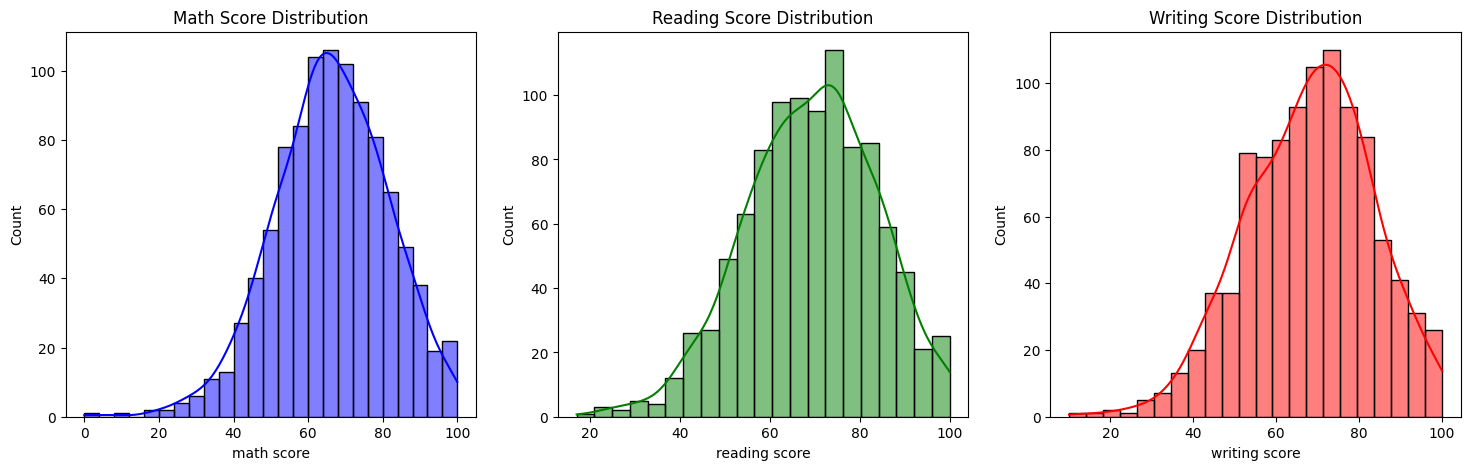

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(students_data['math score'], kde=True, ax=axes[0], color='blue').set_title('Math Score Distribution')
sns.histplot(students_data['reading score'], kde=True, ax=axes[1], color='green').set_title('Reading Score Distribution')
sns.histplot(students_data['writing score'], kde=True, ax=axes[2], color='red').set_title('Writing Score Distribution')
plt.show()

1. **Math Score Distribution**: The histogram shows a roughly normal distribution with a slight skew towards higher scores.
2. **Reading Score Distribution**: This is also approximately normal but with a slight skew towards higher scores, similar to math scores.
3. **Writing Score Distribution**: Similar to reading and math, the writing scores are normally distributed with some skewness towards higher scores.


### Correlations Among Scores

Now let's investigate the relationships between different test scores can provide insights into how students' performances in one area might relate to another.

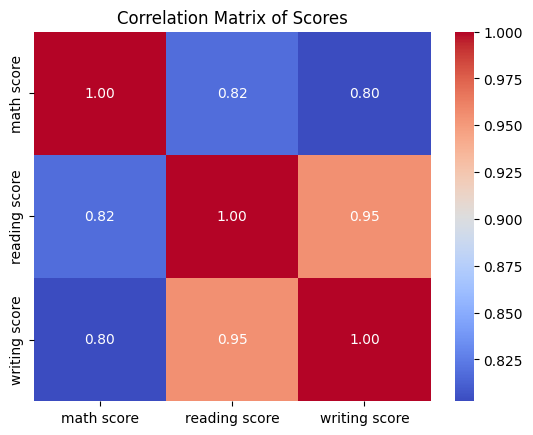

In [7]:
score_corr = students_data[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(score_corr, annot=True, cmap='coolwarm', fmt=".2f").set_title('Correlation Matrix of Scores')
plt.show()

- The scores across different subjects show strong positive correlations, indicating that students who perform well in one subject tend to perform well in others. The correlation coefficients are above 0.8, suggesting a very strong relationship between these academic performances.

### Categorical Data Analysis

Let's visualize how categorical variables such as gender and parental education level affect scores can highlight differences in performance across these dimensions.

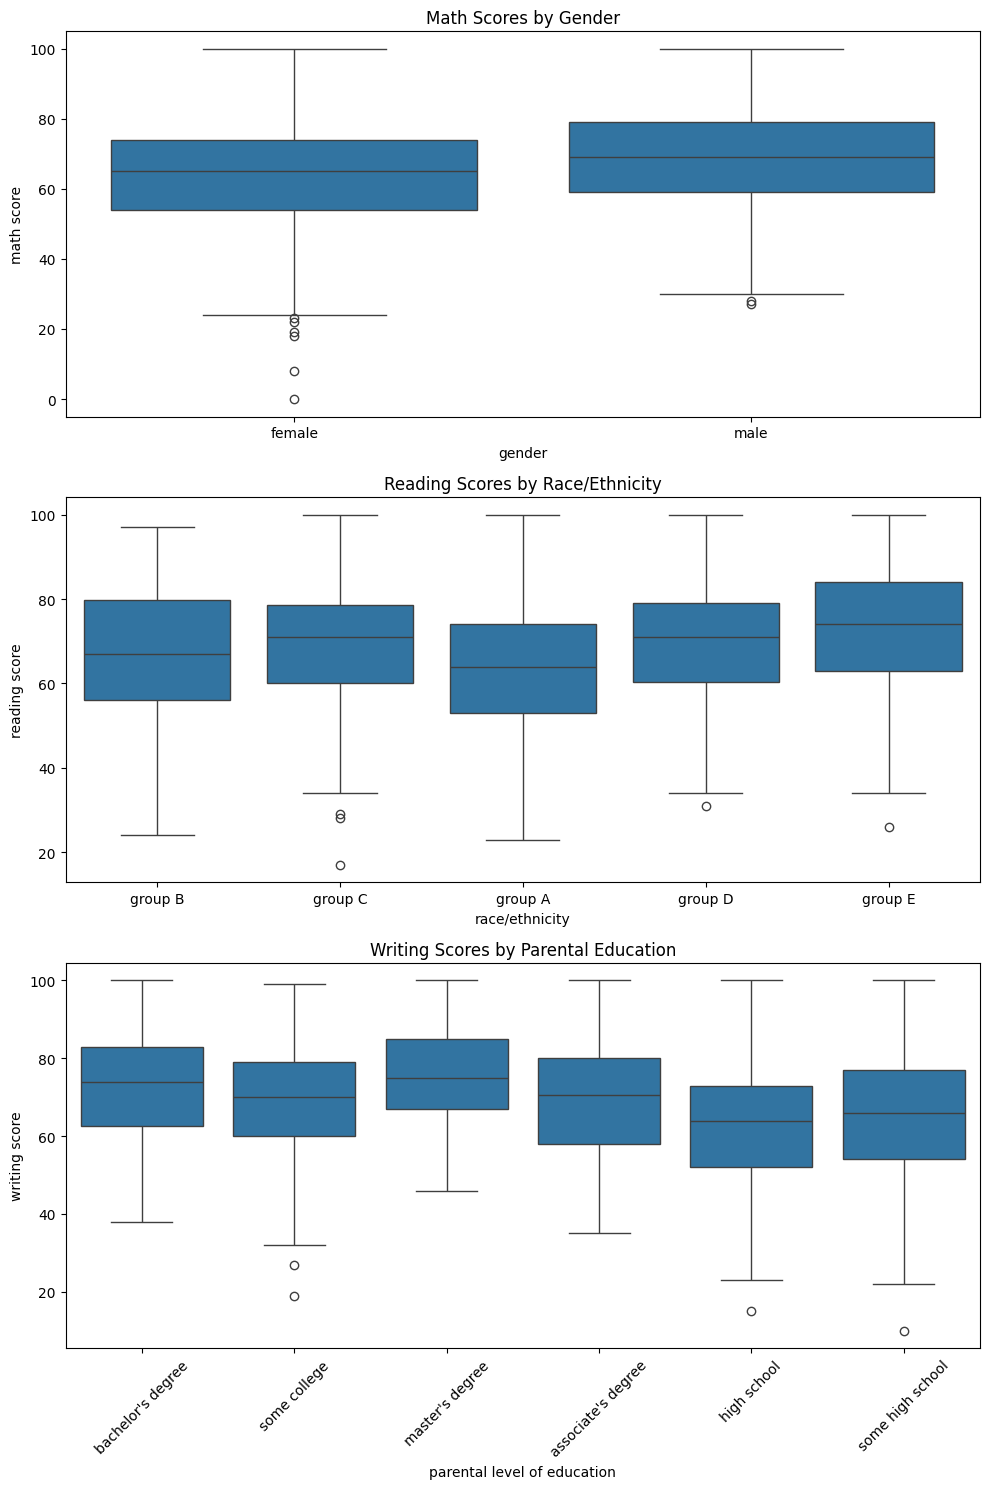

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(x='gender', y='math score', data=students_data, ax=axes[0]).set_title('Math Scores by Gender')
sns.boxplot(x='race/ethnicity', y='reading score', data=students_data, ax=axes[1]).set_title('Reading Scores by Race/Ethnicity')
sns.boxplot(x='parental level of education', y='writing score', data=students_data, ax=axes[2]).set_title('Writing Scores by Parental Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Score Analysis

Let's analyze the average scores across different categories to further identify trends and patterns in student performance.

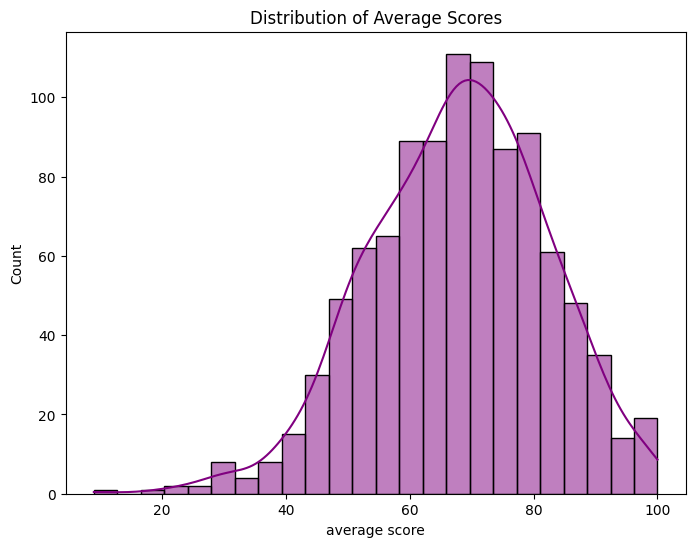

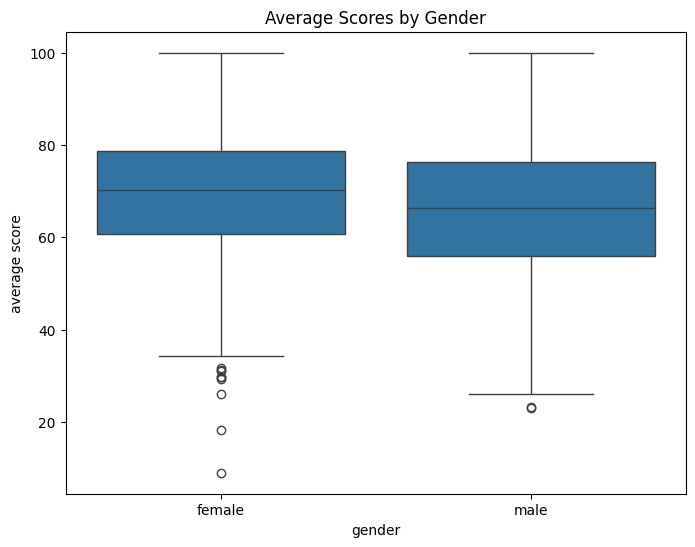

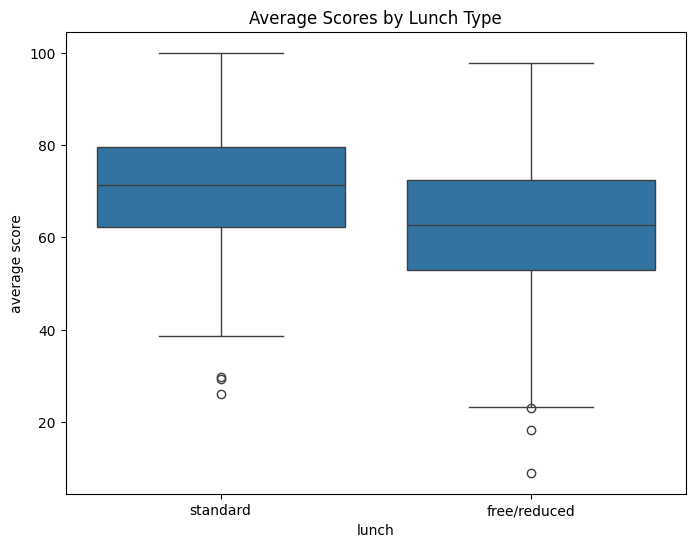

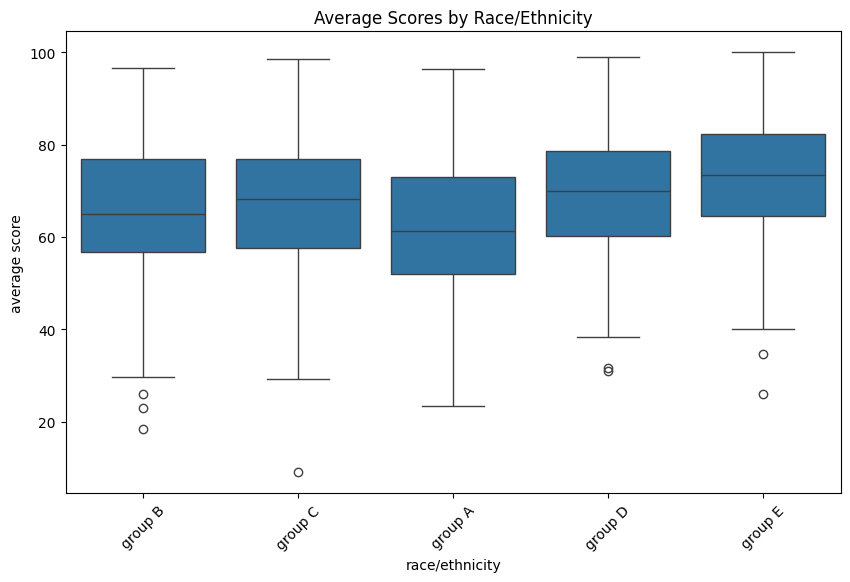

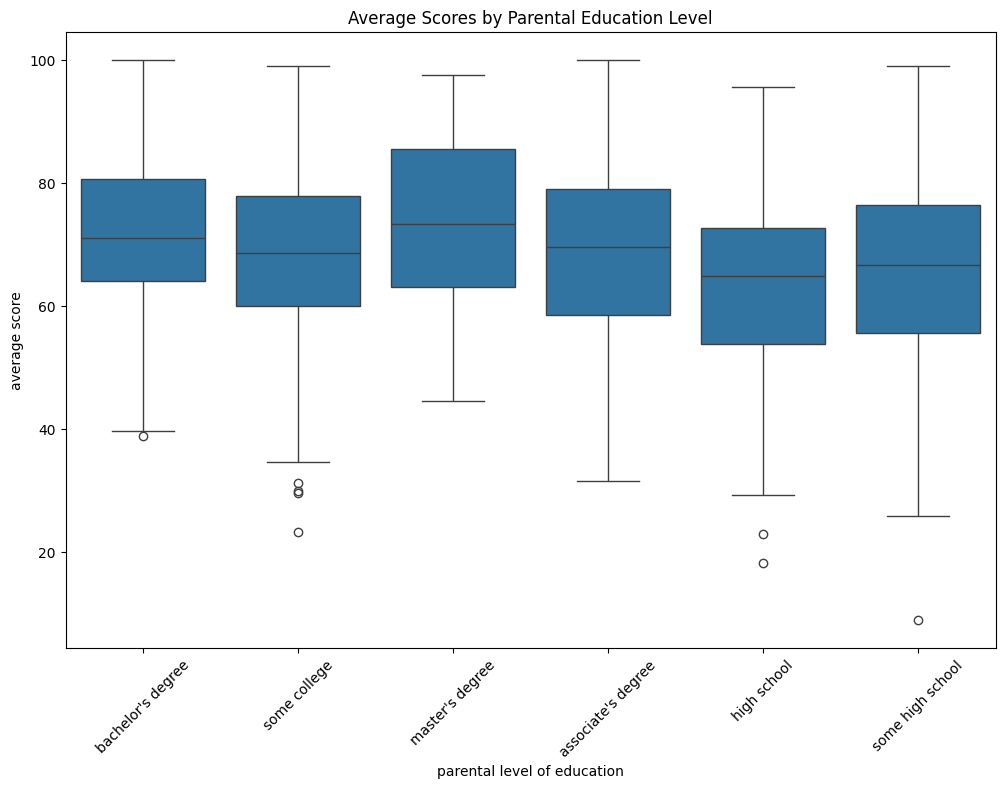

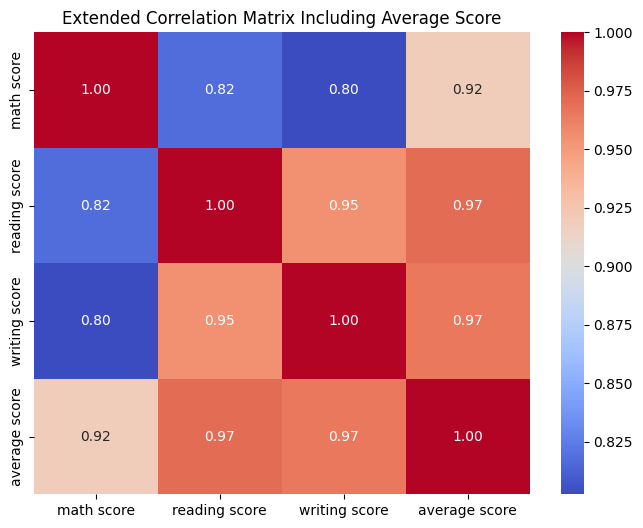

In [9]:
# Distribution of the average score
plt.figure(figsize=(8, 6))
sns.histplot(students_data['average score'], kde=True, color='purple').set_title('Distribution of Average Scores')
plt.show()

# Boxplot to analyze average scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='average score', data=students_data).set_title('Average Scores by Gender')
plt.show()

# Average scores by lunch type (a proxy for socioeconomic status)
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='average score', data=students_data).set_title('Average Scores by Lunch Type')
plt.show()

# Average scores by race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race/ethnicity', y='average score', data=students_data).set_title('Average Scores by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

# Analyzing average scores by parental level of education
plt.figure(figsize=(12, 8))
sns.boxplot(x='parental level of education', y='average score', data=students_data).set_title('Average Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

# Heatmap to see correlations including the average score
full_score_corr = students_data[['math score', 'reading score', 'writing score', 'average score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(full_score_corr, annot=True, cmap='coolwarm', fmt=".2f").set_title('Extended Correlation Matrix Including Average Score')
plt.show()

1. Distribution of Average Scores
    - The histogram of average scores shows a normal distribution with a slight skew towards higher scores, which is consistent with the individual subject score distributions.

2. Average Scores by Gender
    - The boxplot illustrates differences in average scores by gender. This may indicate that one gender could be slightly outperforming the other on average across subjects.

3. Average Scores by Lunch Type
    - Lunch type, which can be an indicator of socioeconomic status, shows a clear distinction in average scores. Students with 'standard' lunch generally perform better than those with 'free/reduced' lunch, suggesting that economic factors play a significant role in academic performance.

4. Average Scores by Race/Ethnicity
    - The boxplot reveals variations in average scores among different racial/ethnic groups. This could highlight disparities that may be influenced by a variety of socioeconomic and educational factors.

5. Average Scores by Parental Education Level
    - There is a noticeable trend where students with parents who have higher levels of education tend to have higher average scores. This relationship underscores the potential impact of parental education on a student's academic achievements.

6. Extended Correlation Matrix Including Average Score
    - The correlation matrix now includes the average score, which shows strong positive correlations with the individual subject scores. This supports the consistency of performance across different subjects for individual students.

These insights further the understanding of how socio-economic status, parental background, and other demographic factors might influence student performance.

They now provide us with a strong basis for more detailed statistical testing or predictive modeling to explore causality or predictions of future performance based on these factors.

### Cross-Category Analysis

Let's delve deeper into the relationships between different categories and their impact on student performance, to manually observe patterns.

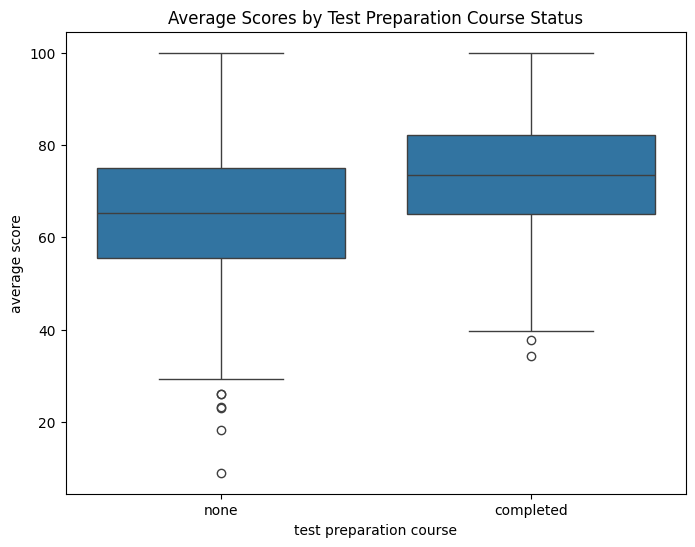

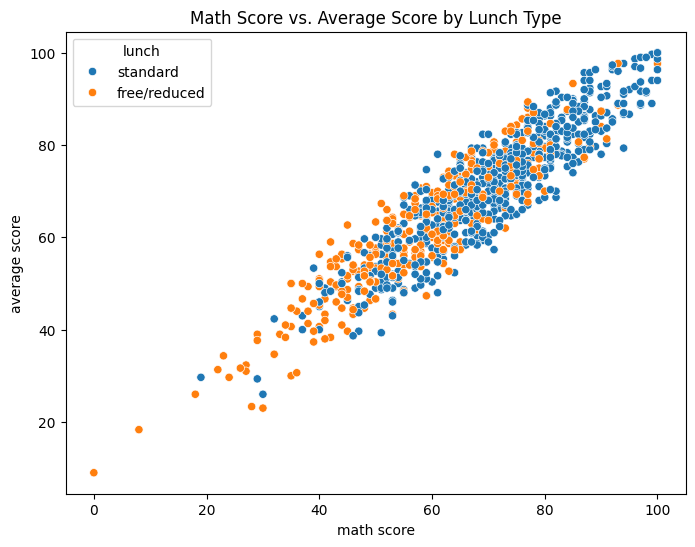

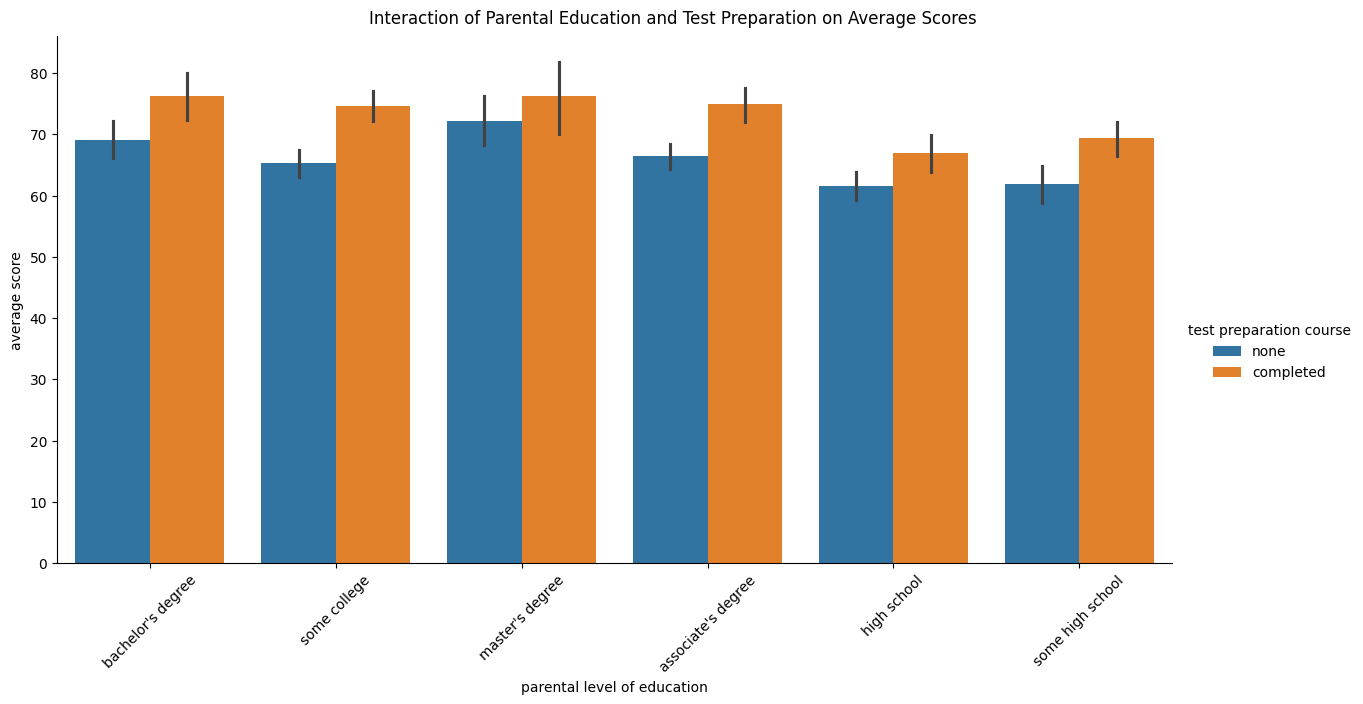

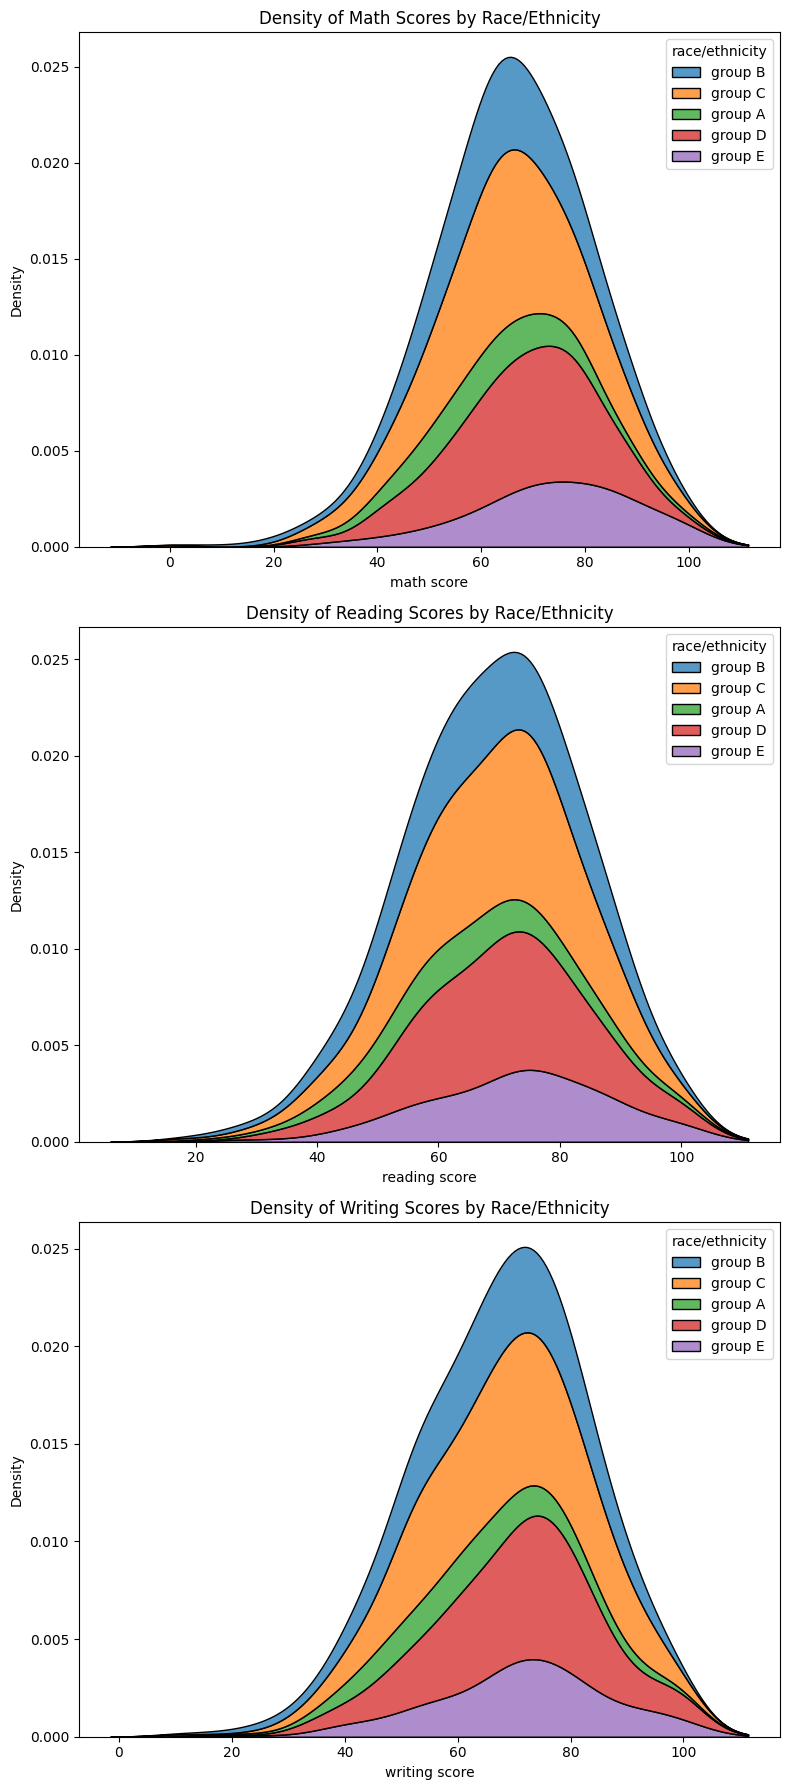

In [10]:
# Analyzing the impact of test preparation course completion on average scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='average score', data=students_data).set_title('Average Scores by Test Preparation Course Status')
plt.show()

# Scatter plot of math score vs. average score colored by lunch type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='average score', hue='lunch', data=students_data).set_title('Math Score vs. Average Score by Lunch Type')
plt.show()

# Exploring interaction between parental education and test preparation course on average scores
g = sns.catplot(x='parental level of education', y='average score', hue='test preparation course', kind='bar', data=students_data, height=6, aspect=2)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Interaction of Parental Education and Test Preparation on Average Scores', y=1.02)
plt.show()

# Examining distribution of scores across different race/ethnicity with KDE plots for a deeper look into the density and distribution
fig, axes = plt.subplots(3, 1, figsize=(8, 18))
sns.kdeplot(data=students_data, x='math score', hue='race/ethnicity', multiple='stack', ax=axes[0]).set_title('Density of Math Scores by Race/Ethnicity')
sns.kdeplot(data=students_data, x='reading score', hue='race/ethnicity', multiple='stack', ax=axes[1]).set_title('Density of Reading Scores by Race/Ethnicity')
sns.kdeplot(data=students_data, x='writing score', hue='race/ethnicity', multiple='stack', ax=axes[2]).set_title('Density of Writing Scores by Race/Ethnicity')
plt.tight_layout()
plt.show()

1. Average Scores by Test Preparation Course Status
    - **Observations**: Students who have completed a test preparation course generally achieve higher average scores compared to those who have not.
    - **Analysis**: The completion of test preparation courses appears to significantly enhance students' performance, as indicated by the higher median and narrower interquartile range in the scores of those who completed the course.

2. Math Score vs. Average Score by Lunch Type
    - **Observations**: There is a strong positive correlation between math scores and average scores, which is segmented by lunch type. Students with standard lunch generally score higher than those with free/reduced lunch.
    - **Analysis**: The type of lunch, serving as a proxy for socioeconomic status, impacts student performance. Those with standard lunches likely have more stable socioeconomic backgrounds, which correlate with better academic performance.

3. Interaction of Parental Education and Test Preparation on Average Scores
- **Observations**: Average scores increase with the level of parental education and are further enhanced by completion of test preparation courses.
- **Analysis**: Parental education level serves as an influential factor in student performance, likely due to associated educational support at home. The impact is more pronounced when combined with test preparation courses.

4. Density of Scores by Race/Ethnicity
    - **Math Scores**:
        - Wider spreads in performance in groups with lower socioeconomic indicators.
        - Higher peaks and tighter distributions in groups likely having better access to educational resources.
    - **Reading and Writing Scores**:
        - Similar patterns to math scores, with certain racial/ethnic groups showing higher median scores and tighter distributions.
    - **Analysis**: The density plots highlight disparities in scores across different demographic groups.

### Multi-Variable Analysis

Let's explore the interactions between multiple variables to uncover more nuanced relationships and patterns in student performance manually.

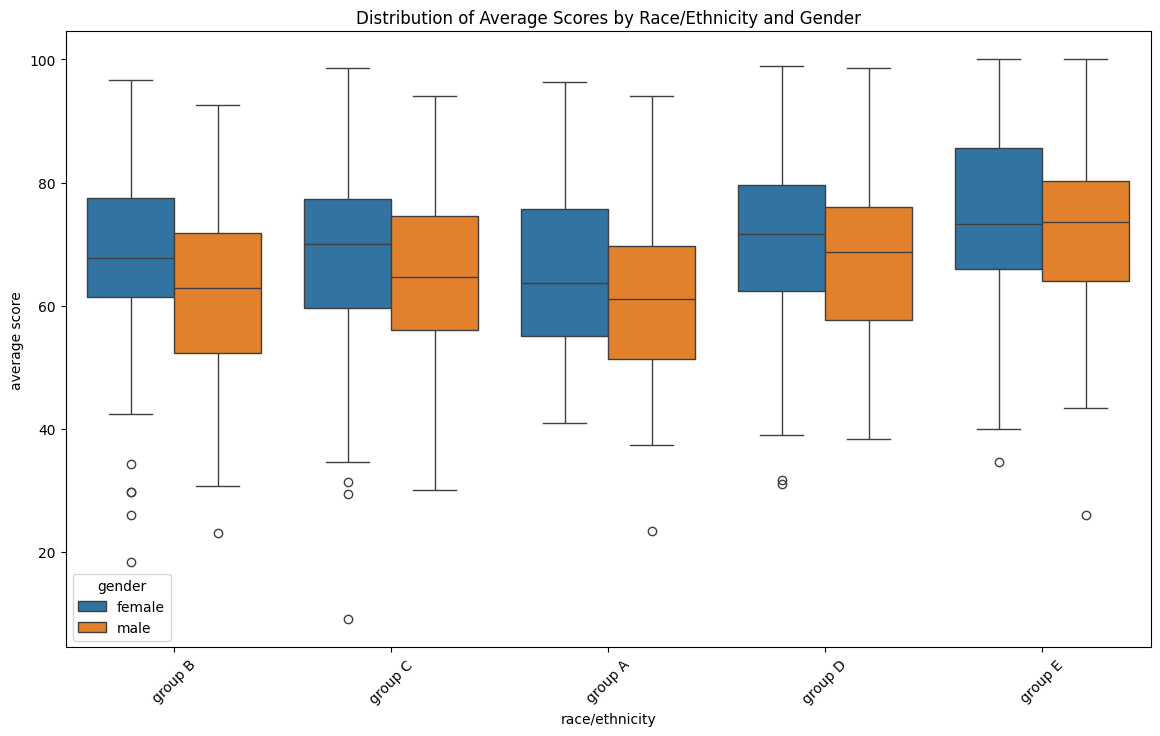

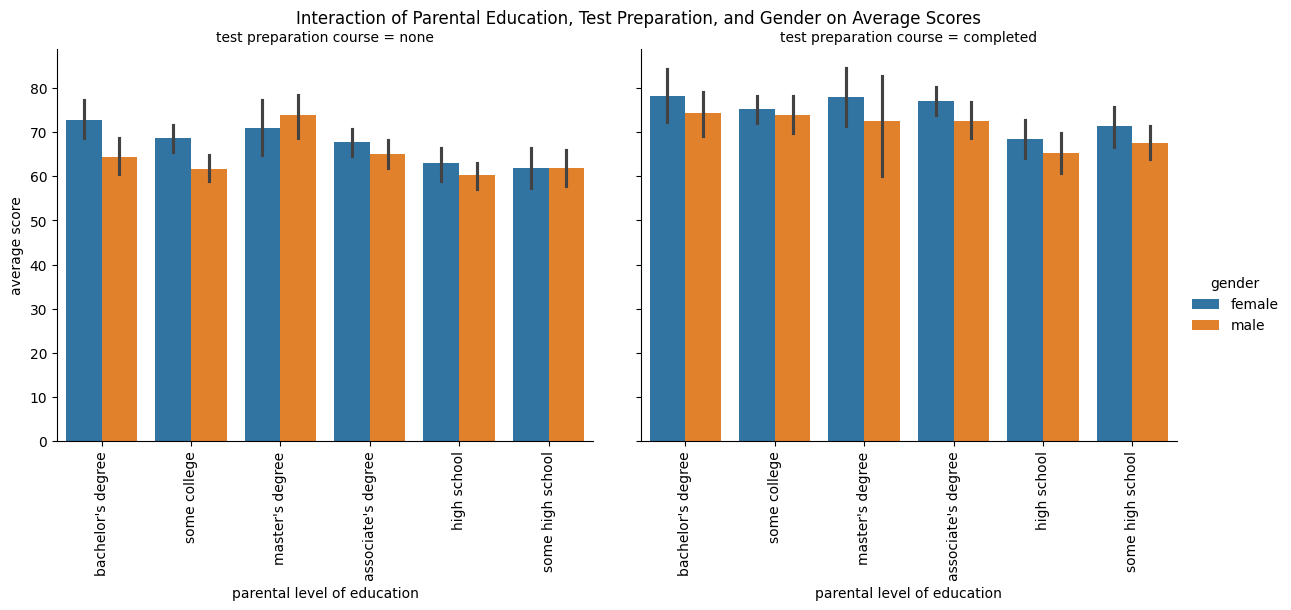

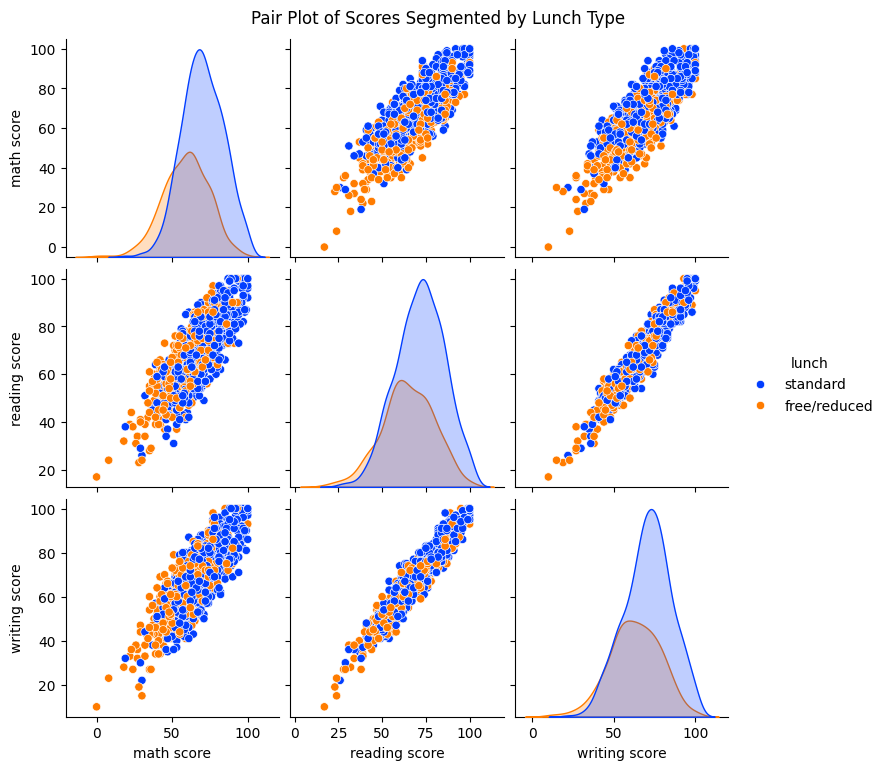

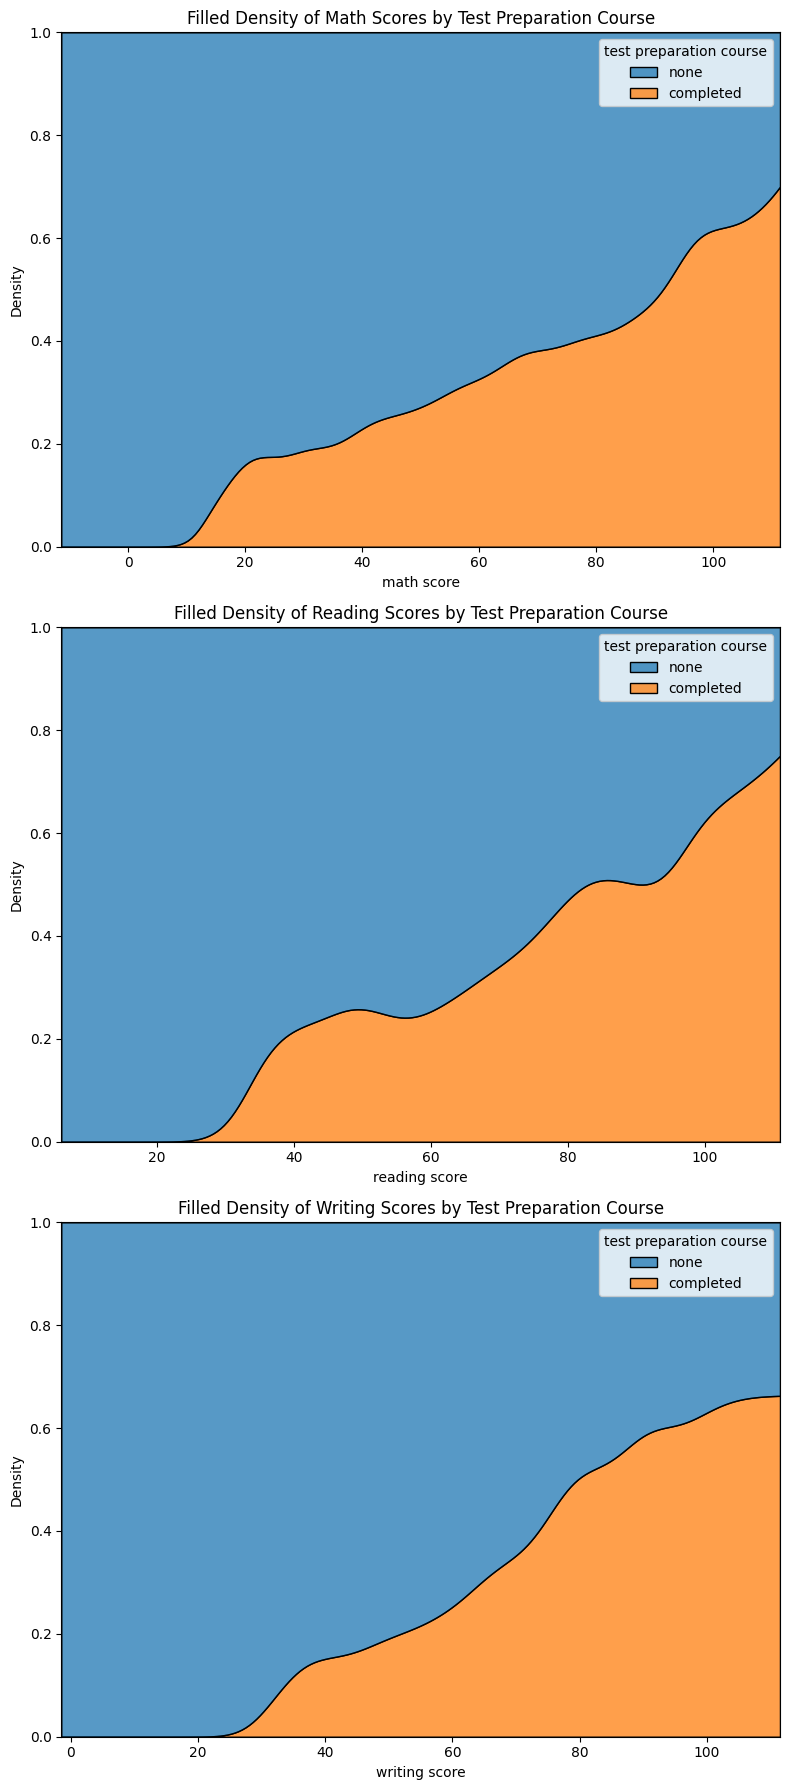

<Figure size 1000x600 with 0 Axes>

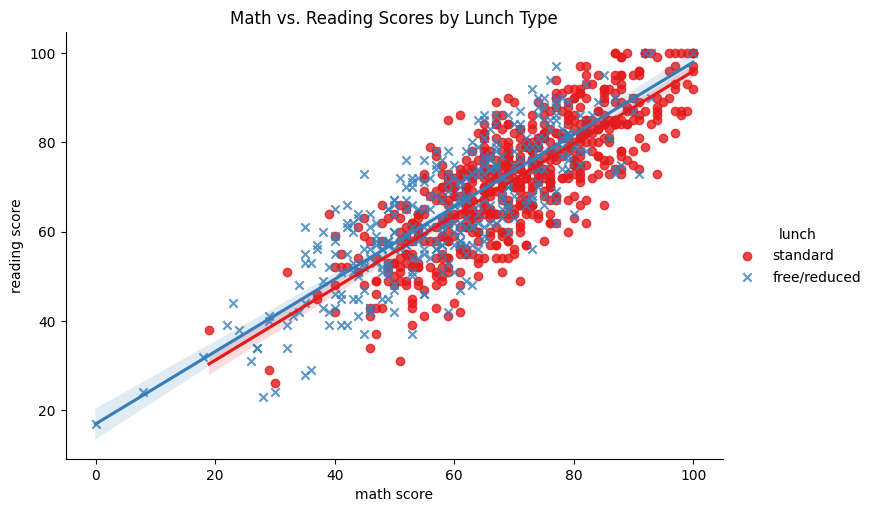

<Figure size 1000x600 with 0 Axes>

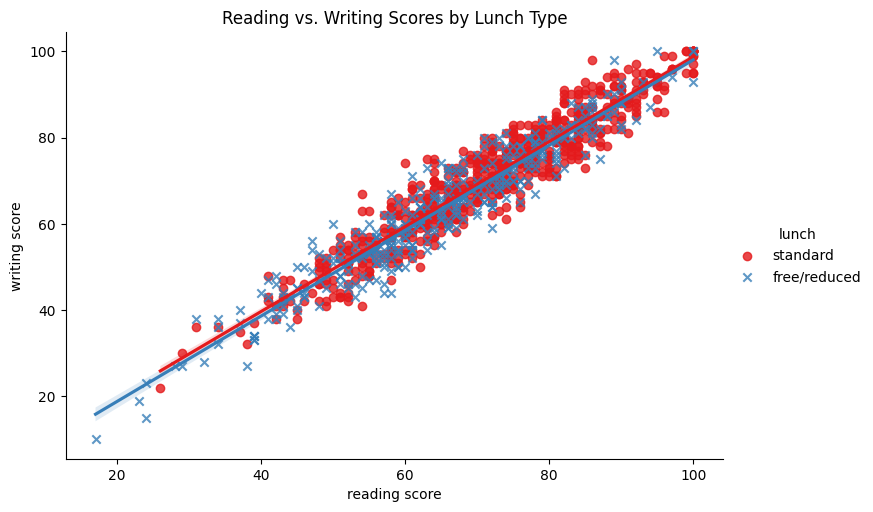

<Figure size 1000x600 with 0 Axes>

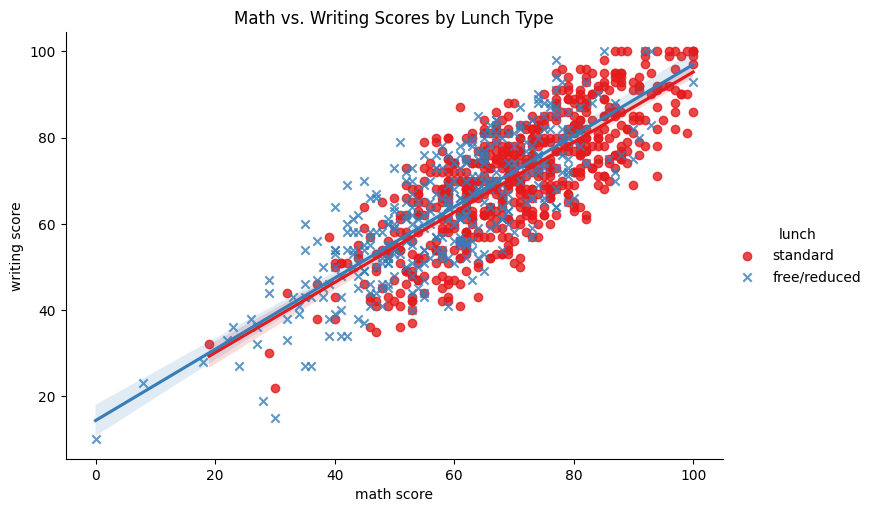

In [11]:
# Analysis of variance in average scores by both gender and race/ethnicity using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='race/ethnicity', y='average score', hue='gender', data=students_data)
plt.title('Distribution of Average Scores by Race/Ethnicity and Gender')
plt.xticks(rotation=45)
plt.show()

# Visualizing the interaction of parental education, test preparation, and gender on average scores
g = sns.catplot(x='parental level of education', y='average score', hue='gender', col='test preparation course', kind='bar', data=students_data, height=5, aspect=1.2)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in g
g.fig.suptitle('Interaction of Parental Education, Test Preparation, and Gender on Average Scores')
plt.show()

# Exploring correlations between numeric scores and creating a pair plot segmented by lunch type
pair_grid = sns.pairplot(data=students_data, vars=['math score', 'reading score', 'writing score'], hue='lunch', palette='bright')
pair_grid.fig.suptitle('Pair Plot of Scores Segmented by Lunch Type', y=1.02)
plt.show()

# Density plots to examine score distributions more closely by test preparation course across different subjects
fig, axes = plt.subplots(3, 1, figsize=(8, 18))
sns.kdeplot(data=students_data, x='math score', hue='test preparation course', multiple='fill', ax=axes[0]).set_title('Filled Density of Math Scores by Test Preparation Course')
sns.kdeplot(data=students_data, x='reading score', hue='test preparation course', multiple='fill', ax=axes[1]).set_title('Filled Density of Reading Scores by Test Preparation Course')
sns.kdeplot(data=students_data, x='writing score', hue='test preparation course', multiple='fill', ax=axes[2]).set_title('Filled Density of Writing Scores by Test Preparation Course')
plt.tight_layout()
plt.show()


# Scatter plot with trend lines for Math vs. Reading scores segmented by lunch type
plt.figure(figsize=(10, 6))
sns.lmplot(x='math score', y='reading score', hue='lunch', data=students_data, markers=['o', 'x'], palette='Set1', aspect=1.5)
plt.title('Math vs. Reading Scores by Lunch Type')
plt.show()

# Scatter plot with trend lines for Reading vs. Writing scores segmented by lunch type
plt.figure(figsize=(10, 6))
sns.lmplot(x='reading score', y='writing score', hue='lunch', data=students_data, markers=['o', 'x'], palette='Set1', aspect=1.5)
plt.title('Reading vs. Writing Scores by Lunch Type')
plt.show()

# Scatter plot with trend lines for Math vs. Writing scores segmented by lunch type
plt.figure(figsize=(10, 6))
sns.lmplot(x='math score', y='writing score', hue='lunch', data=students_data, markers=['o', 'x'], palette='Set1', aspect=1.5)
plt.title('Math vs. Writing Scores by Lunch Type')
plt.show()

1. Distribution of Average Scores by Race/Ethnicity and Gender
- **Observations**: The plot showcases the distribution of average scores across different race/ethnicity groups segmented by gender.
- **Analysis**:
  - **Race/Ethnicity Variance**: There is noticeable variance in scores across different racial/ethnic groups.
  - **Gender Differences**: In some groups, such as Group E, males tend to have slightly higher median scores than females, whereas in other groups, like Group C, the distribution is more balanced.

2. Interaction of Parental Education, Test Preparation, and Gender on Average Scores
- **Observations**: The bar charts display average scores based on parental education levels, comparing scores between genders and based on whether students completed a test preparation course.
- **Analysis**:
  - **Parental Education Impact**: Higher levels of parental education generally correlate with higher average scores.
  - **Gender and Test Preparation Influence**: Completing a test preparation course generally boosts scores across all parental education levels and for both genders, though the impact is more pronounced in some groups than others.

3. Pair Plot of Scores Segmented by Lunch Type
- **Observations**: Scatter and density plots for math, reading, and writing scores, segmented by lunch type.
- **Analysis**:
  - **Correlations**: Strong positive correlations exist between all three academic scores, with variations in density distributions indicating differences in score concentration and spread based on lunch type.
  - **Socioeconomic Status Indicators**: Standard lunch typically correlates with higher scores and a more concentrated density, while free/reduced lunch is associated with a broader spread of lower scores.

4. Filled Density of Scores by Test Preparation Course
- **Observations**: Density plots filled by the proportion of students who completed a test preparation course versus those who did not, across math, reading, and writing scores.
- **Analysis**:
  - **Effectiveness of Test Preparation**: Students who completed test preparation courses not only have higher density peaks but also higher overall score ranges.

#  Model: Analysis, Hypothesis Testing, Machine Learning

### Basic Hypothesis Testing

Having explored the dataset and gained insights into the factors influencing student performance, we can now move on to a basic hypothesis test and a simple Linear Regression model to predict student performance based on the available features.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [13]:
# Load the data separately to avoid modifying the original dataframe
data = students_data.copy()

# Create dummy variables for categorical features
data_encoded = pd.get_dummies(data, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Hypothesis 1: Test if students who completed the test preparation course score significantly higher
group1 = data[data['test preparation course'] == 'completed']['average score']
group2 = data[data['test preparation course'] == 'none']['average score']

# T-test
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test between test prep completed vs. none: t-statistic = {t_stat}, p-value = {p_val}")

# Hypothesis 2: Analyze if parental education level affects scores
anova_results = f_oneway(
    data[data['parental level of education'] == "some high school"]['average score'],
    data[data['parental level of education'] == "high school"]['average score'],
    data[data['parental level of education'] == "some college"]['average score'],
    data[data['parental level of education'] == "associate's degree"]['average score'],
    data[data['parental level of education'] == "bachelor's degree"]['average score'],
    data[data['parental level of education'] == "master's degree"]['average score']
)

print(f"ANOVA test on parental education levels: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

# Model Building: Predicting average score using linear regression
features = data_encoded.drop(['math score', 'reading score', 'writing score', 'average score'], axis=1)
target = data['average score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Model Mean Squared Error: {mse}")
print(f"Model R² score: {r2}")

T-test between test prep completed vs. none: t-statistic = 8.390944443482592, p-value = 1.633780203592351e-16
ANOVA test on parental education levels: F-statistic = 10.753146962336567, p-value = 4.3810464809431664e-10
Model Accuracy: 0.1341065260435773
Model Mean Squared Error: 185.6186111111111
Model R² score: 0.1341065260435773


#### Feature Plotting

Let's visualize the relationships between different features and the target variable (average score) to identify potential patterns and correlations.

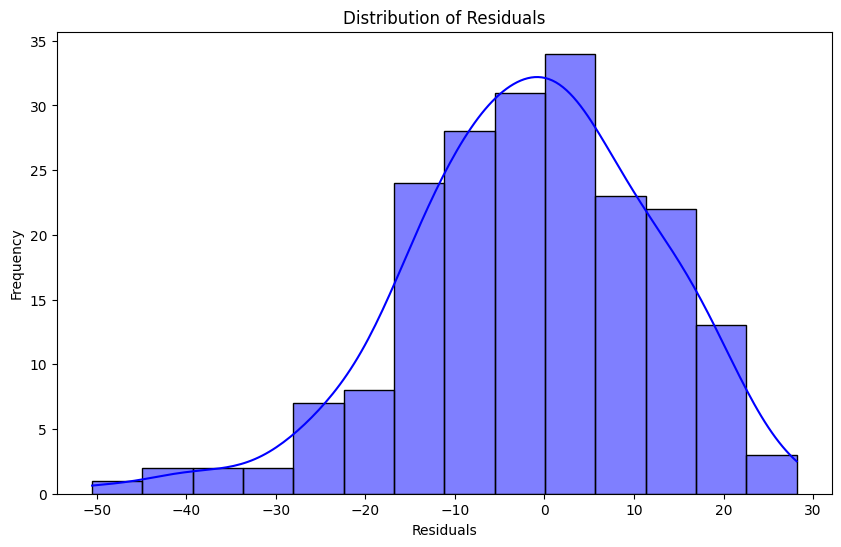

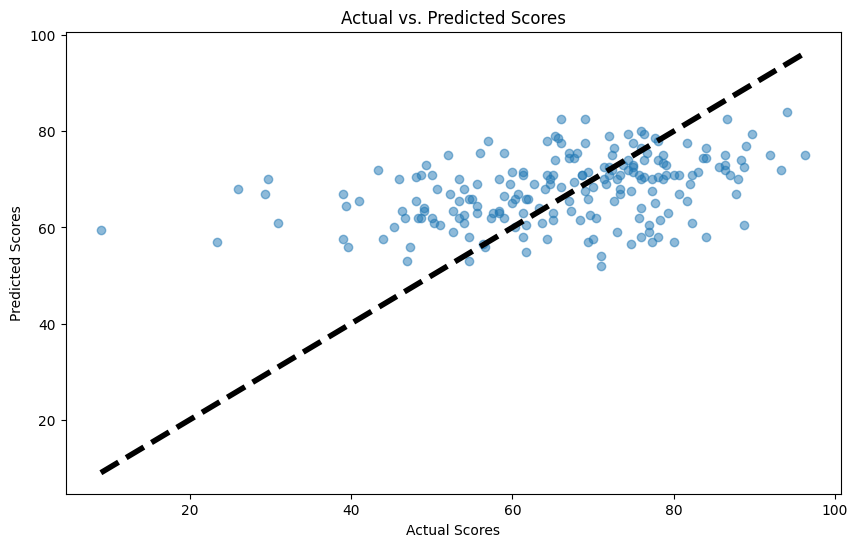

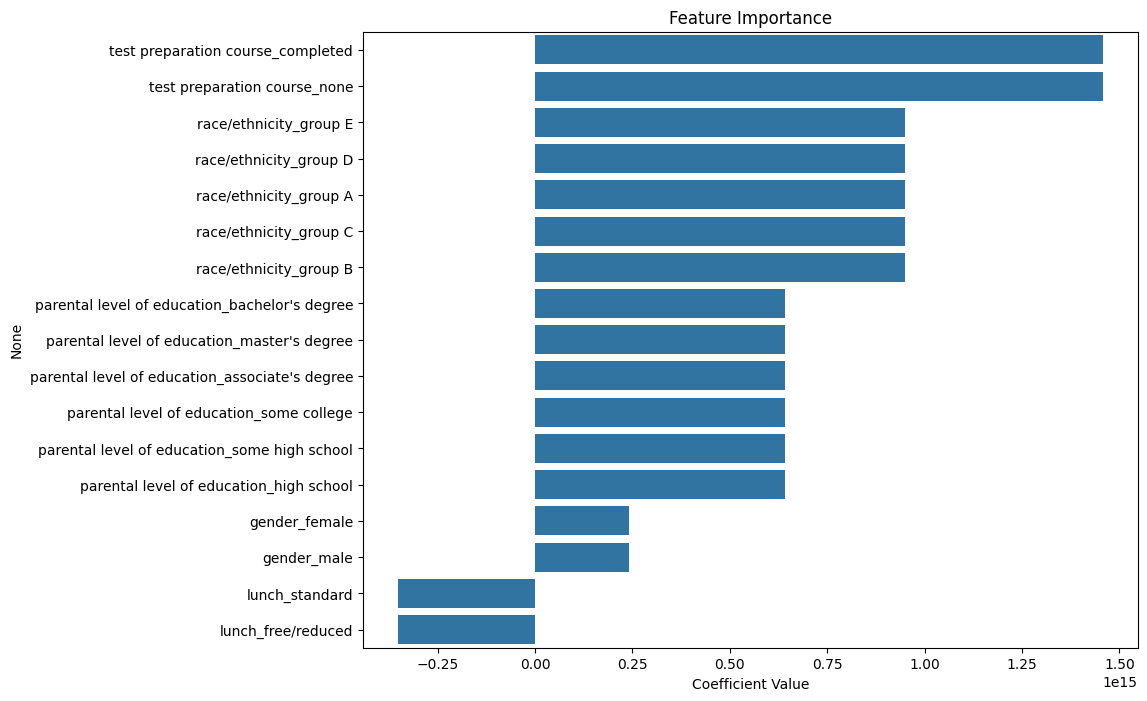

In [14]:
# Plotting the residuals to understand the distribution
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of actual vs. predicted scores to visualize prediction accuracy
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Adding a perfect prediction line
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Checking the importance of features
coefficients = pd.DataFrame(model.coef_, X_test.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.show()

#### Basic Model + Hypothesis Testing Analysis

### Hypothesis Testing Results
- **Test Preparation Course Impact (T-test)**:
  - **Results**: The T-test between students who completed the test preparation course and those who did not shows a significant difference in average scores (t-statistic = 8.39, p-value < 0.00001).
  - **Interpretation**: This result strongly suggests that completing the test preparation course significantly improves students' average scores. The very low p-value indicates that the probability of observing such a substantial effect by chance is extremely minimal.

- **Parental Education Level Influence (ANOVA)**:
  - **Results**: The ANOVA test across different levels of parental education shows significant differences in student scores (F-statistic = 10.753, p-value < 0.00001).
  - **Interpretation**: There is a statistically significant impact of parental education levels on student performance. Students whose parents have higher education levels tend to perform better academically, which could be attributed to various socio-economic factors and educational support.

### Regression Model Evaluation
- **Residuals Analysis**:
  - The distribution of residuals shows a roughly normal distribution, albeit with some outliers. This indicates that while the model generally predicts reasonable values for average scores, there are cases where the predictions are significantly off.
  - The presence of residuals across the spectrum suggests some heteroscedasticity, meaning the model's predictive accuracy varies across the range of scores.

- **Actual vs. Predicted Scores**:
  - The scatter plot of actual versus predicted scores shows a correlation, but with considerable spread around the line of perfect prediction. This visual supports the relatively low R² value, indicating that the model explains only about 13.41% of the variance in average scores.
  - The model's limited explanatory power and the spread of points suggest that additional variables or more complex models might be necessary to capture the full dynamics affecting student performance.

### Feature Importance
- The bar chart of feature importance reveals which variables have the most significant impact on average scores. Notably:
  - **Test preparation course completion** is a highly positive predictor, aligning with the T-test findings that completing these courses is associated with higher scores.
  - **Parental education levels** (particularly having parents with bachelor's or master's degrees) positively influence scores, also consistent with the ANOVA results.
  - **Lunch type** (standard vs. free/reduced) shows that students receiving a standard lunch, likely indicative of higher socio-economic status, tend to score higher.

Given the current model's limitations, especially with its significantly low accuracy of around just 13%, exploring more complex modeling approaches will provide deeper insights and better predictive accuracy.

### Logistic Regression Model

Let's apply a Logistic Regression model to predict whether a student will pass or fail based on the available features, to explore a different type of predictive analysis that is still simple and interpretable.

T-test between test prep completed vs. none: t-statistic = 8.390944443482592, p-value = 1.633780203592351e-16
ANOVA test on parental education levels: F-statistic = 10.753146962336567, p-value = 4.3810464809431664e-10
Model Accuracy: 0.86
Model Mean Squared Error: 0.14
Confusion Matrix:
[[  0  27]
 [  1 172]]


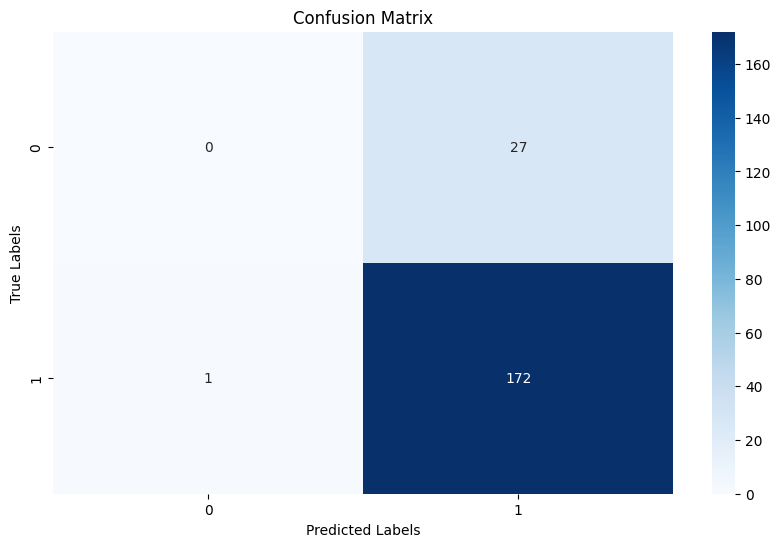

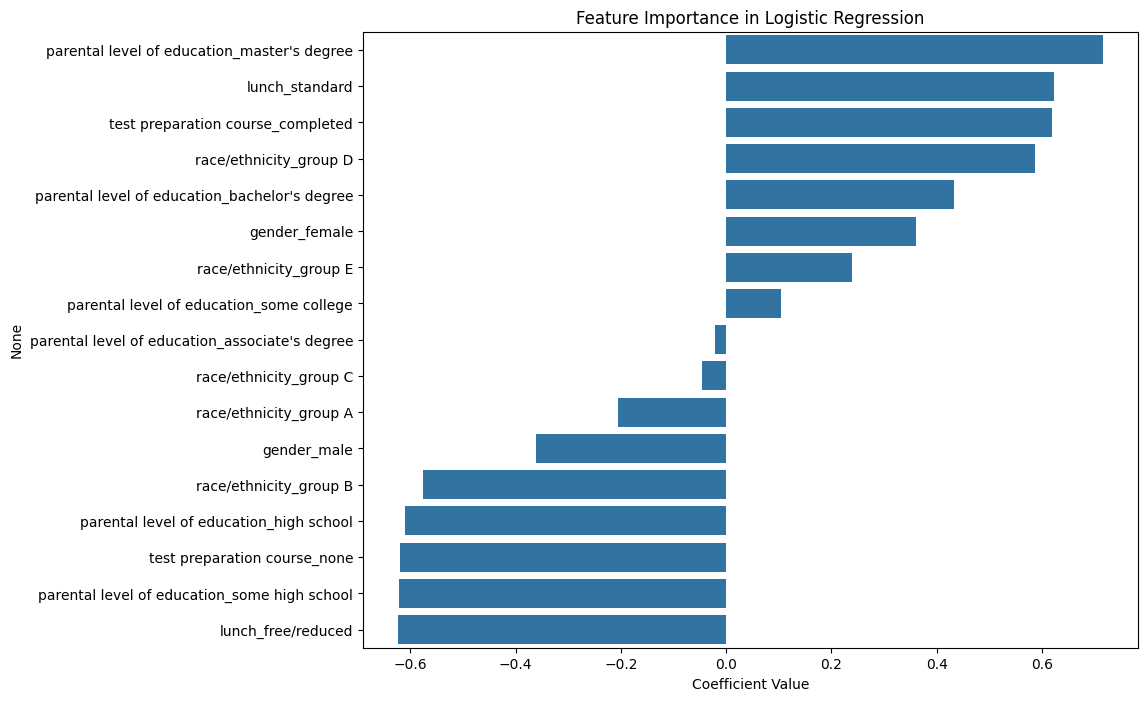

In [15]:
# Load and prepare the data
data = students_data.copy()

# Convert scores to a binary 'pass' or 'fail' based on an average score threshold of 50
data['passed'] = np.where(data['average score'] >= 50, 1, 0)

# Create dummy variables for categorical features
data_encoded = pd.get_dummies(data, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Hypothesis testing as previously
group1 = data[data['test preparation course'] == 'completed']['average score']
group2 = data[data['test preparation course'] == 'none']['average score']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test between test prep completed vs. none: t-statistic = {t_stat}, p-value = {p_val}")

anova_results = f_oneway(
    data[data['parental level of education'] == "some high school"]['average score'],
    data[data['parental level of education'] == "high school"]['average score'],
    data[data['parental level of education'] == "some college"]['average score'],
    data[data['parental level of education'] == "associate's degree"]['average score'],
    data[data['parental level of education'] == "bachelor's degree"]['average score'],
    data[data['parental level of education'] == "master's degree"]['average score']
)
print(f"ANOVA test on parental education levels: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

# Set up features and target for logistic regression
features = data_encoded.drop(['math score', 'reading score', 'writing score', 'average score', 'passed'], axis=1)
target = data['passed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Model Mean Squared Error: {mse}")
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Displaying the coefficients as feature importances
coefficients = pd.DataFrame(logistic_model.coef_.flatten(), X_train.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.show()

### Logistic Regression Analysis & Hypothesis Testing Results

#### Hypothesis Testing Results
- **Test Preparation Course Impact (T-test)**:
  - **Results**: The T-test results show a significant difference in average scores between students who completed the test preparation course and those who did not, with a t-statistic of 8.39 and a p-value well below the 0.00001 threshold.
  - **Interpretation**: This substantial difference strongly suggests that completing the test preparation course significantly enhances students' average scores. The extremely low p-value underscores the unlikely chance that such a distinct effect is due to random variation.

- **Parental Education Level Influence (ANOVA)**:
  - **Results**: The ANOVA test indicates significant variances in student scores based on the level of parental education, with an F-statistic of 10.753 and a p-value significantly less than 0.00001.
  - **Interpretation**: These findings confirm a statistically significant correlation between parental education levels and student academic performance. Higher parental education levels generally lead to better student outcomes, possibly due to increased educational support or socioeconomic advantages.

#### Logistic Regression Model Evaluation
- **Model Accuracy**:
  - The logistic regression model achieved an accuracy of 86%, which is robust for classification tasks. However, the confusion matrix reveals a notable imbalance in predictive capability, particularly in failing to predict any of the few cases classified as failing (score below 50).
  
- **Confusion Matrix**:
  - The model predicted the majority class ('passed') with high accuracy but failed entirely to predict the minority class ('failed'). This suggests a model bias towards the majority class, which could be due to an imbalance in the dataset or the model's sensitivity to class distribution.

- **Feature Importance**:
  - The coefficients derived from the logistic regression provide insights into which features most influence the likelihood of a student passing:
    - **Parental Education**: Higher degrees (Master's, Bachelor's) positively influence passing chances.
    - **Lunch Type**: Standard lunch, a proxy for better socioeconomic status, is associated with higher passing rates.
    - **Test Preparation**: Completion of a test preparation course is a strong positive predictor, consistent with the T-test findings.

### Advanced Model: Logistic Regression with SMOTE

To address the imbalance in the dataset and improve the model's predictive performance, we'll apply the Synthetic Minority Over-sampling Technique (SMOTE) to upsample the minority class ('failed') and retrain the logistic regression model.

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Model Accuracy: 0.83
Model Mean Squared Error: 0.17
Confusion Matrix:
[[  5  22]
 [ 12 161]]


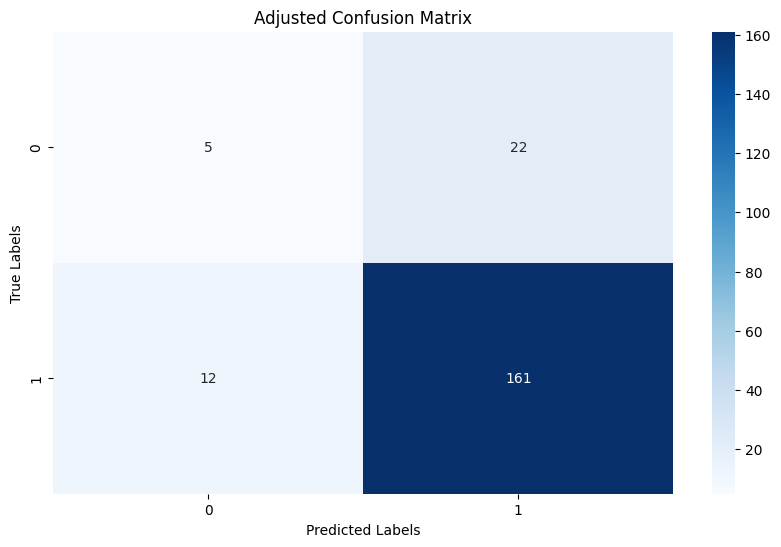

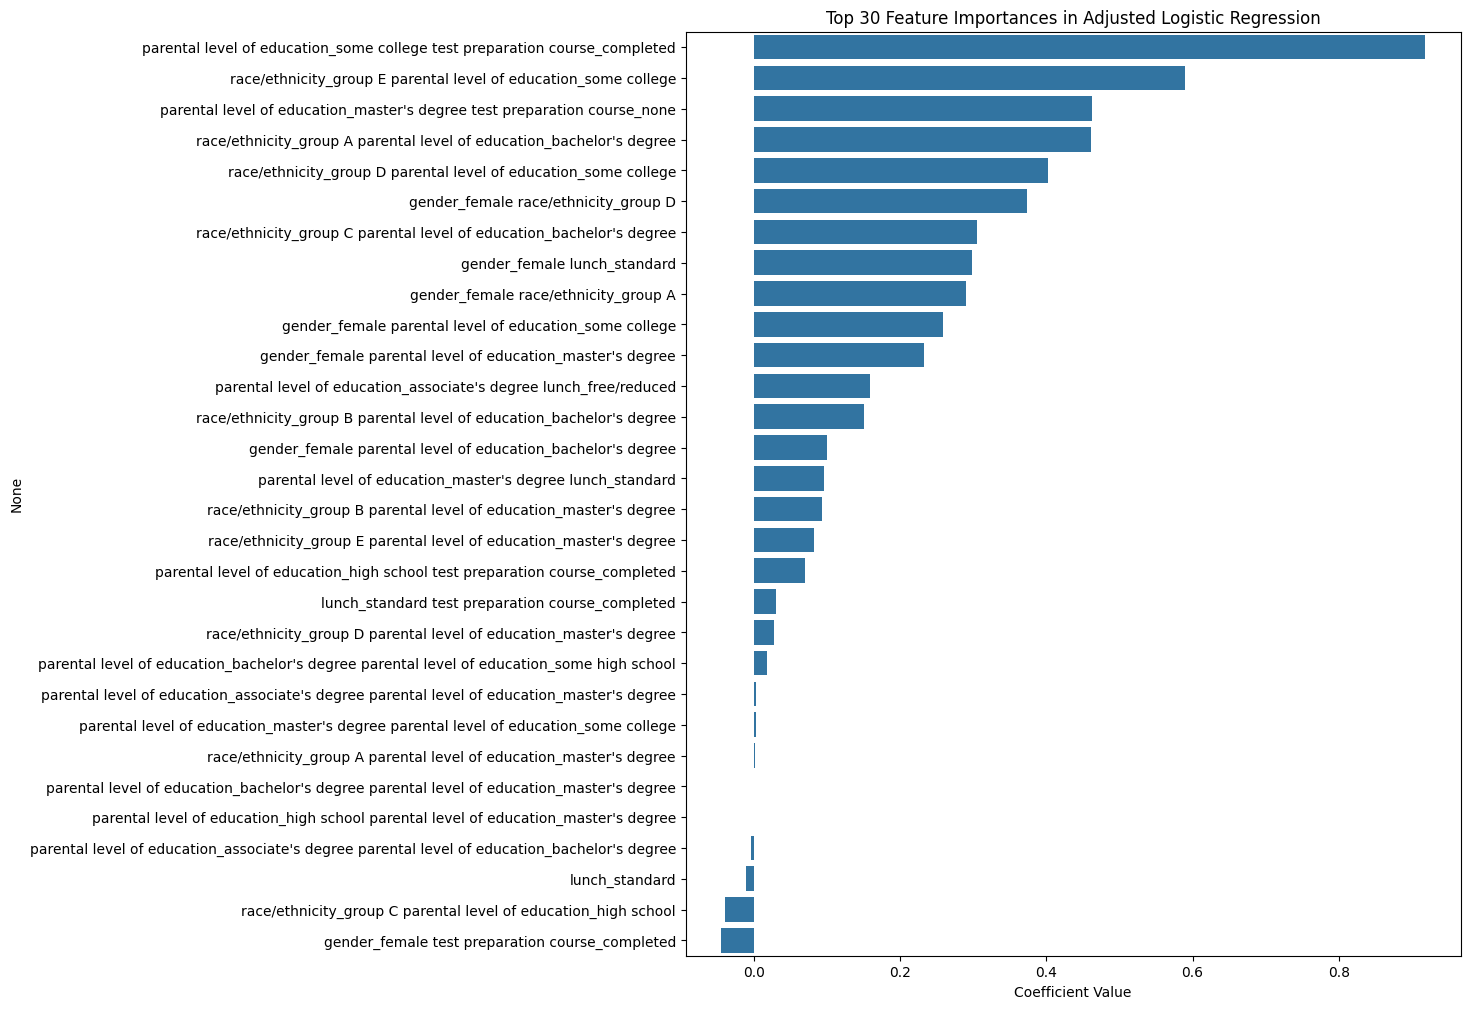

In [17]:
# Load and prepare the data
data = students_data.copy()
data['passed'] = np.where(data['average score'] >= 50, 1, 0)
data_encoded = pd.get_dummies(data, columns=[
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Set up features and target
features = data_encoded.drop(['math score', 'reading score', 'writing score', 'average score', 'passed'], axis=1)
target = data['passed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply SMOTE to balance class distribution
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create a pipeline that applies polynomial features and then fits a logistic regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('logistic', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_train_res, y_train_res)

# Predict on the test set using the pipeline
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Model Mean Squared Error: {mse}")
print("Confusion Matrix:")
print(conf_matrix)


# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Adjusted Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display feature importances including interactions
importance = pipeline.named_steps['logistic'].coef_[0]
feature_names = pipeline.named_steps['poly'].get_feature_names_out(input_features=features.columns)
coefficients = pd.DataFrame(importance, index=feature_names, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Display only the top 30 features to avoid clutter
top_coefficients = coefficients.head(30)

plt.figure(figsize=(10, 12))
sns.barplot(x=top_coefficients.Coefficient, y=top_coefficients.index)
plt.title('Top 30 Feature Importances in Adjusted Logistic Regression')
plt.xlabel('Coefficient Value')
plt.show()

### Advanced Model Analysis

#### Model Description
SMOTE is an oversampling method that generates synthetic samples from the minority class to balance the class distribution. It operates by creating synthetic instances rather than by over-sampling with replacement. This is paired with a logistic regression model that is designed to handle binary classification tasks effectively, predicting a binary outcome ('pass' or 'fail') for each student.

#### Model Implementation and Performance
The logistic regression model was applied after balancing the class distribution with SMOTE on the training data. This implementation aimed to enhance the model's ability to generalize better to unseen data by mitigating the bias towards the majority class, which often occurs in imbalanced datasets.

- **Accuracy and Mean Squared Error (MSE):**
  - The model achieved an accuracy of 83% and a mean squared error of 0.17. While these metrics suggest a reasonably good model performance, they don't fully capture the impact of addressing the class imbalance.

- **Confusion Matrix Analysis:**
  - The confusion matrix revealed that the model correctly predicted the majority of passing students but also misclassified a significant number of failing students as passing. Specifically, it identified 5 true negatives and 161 true positives but also resulted in 22 false negatives and 12 false positives.

#### Detailed Analysis
- **Impact of SMOTE:**
  - The primary benefit of incorporating SMOTE was the enhanced sensitivity towards the minority class (failing students). By synthesizing new examples in the minority class, the model was better trained to recognize patterns indicative of failures, which are typically under-represented in the dataset.
  
- **Comparison to Non-SMOTE Models:**
  - When compared to logistic regression models without SMOTE, the standard model without this technique might show higher overall accuracy but at the cost of higher bias towards the majority class. This often results in poor identification of the minority class, which is a critical flaw when the cost of misclassification is high (e.g., failing students needing intervention).

- **Feature Importance:**
  - The analysis of feature importances revealed that factors such as parental education level, particularly higher education degrees, and completion of test preparation courses significantly influence the model's predictions. These features likely correlate with a higher likelihood of passing, echoing findings from educational research.

#### Conclusion
While the SMOTE-enhanced logistic regression model shows a commendable performance in handling class imbalance, it is essential to consider the trade-offs such as potentially increased false positives. The strength of this model lies in its improved fairness and equity in prediction — crucial for educational settings where early identification of at-risk students can lead to timely and effective interventions.

# Interpretation and Recommendations

#### Insights Drawn from Data Analysis
The application of the logistic regression model enhanced by SMOTE on student performance data provides critical insights into factors influencing educational outcomes. Our analysis indicates that:

1. **Parental Influence**: Students whose parents have higher educational achievements tend to perform better academically. This correlation highlights the role of familial support in educational success.
2. **Preparatory Programs**: Completion of test preparation courses significantly boosts students' chances of passing, underscoring the effectiveness of preparatory education.
3. **Socioeconomic Factors**: The type of lunch students receive, which serves as a proxy for socioeconomic status, strongly correlates with academic performance, suggesting that economic stability plays a crucial role in educational attainment.

#### Policy Recommendations
Based on the findings from our analysis, several policy recommendations can be proposed to educational authorities and decision-makers to improve student outcomes and address disparities:

1. **Enhanced Support for Low-Income Students**: Implement programs that provide free or subsidized educational resources, such as test preparation courses and after-school tutoring, to students from lower socioeconomic backgrounds.
2. **Parental Engagement Programs**: Develop initiatives aimed at increasing parental involvement in their children's education, particularly focusing on underprivileged communities. This could include workshops that educate parents on how they can assist with homework or prepare for college admissions.
3. **Nutrition and Academic Performance**: Address the nutritional needs of students by expanding access to free and nutritious school meals, recognizing the link between proper nutrition and cognitive function.
4. **Targeted Interventions Based on Predictive Analytics**: Utilize predictive models to identify students at risk of underperforming and tailor interventions specifically to their needs. This could involve more personalized learning plans or additional support in subjects where they are predicted to struggle.

#### Further Research and Expansion
To deepen the understanding and enhance the accuracy of predictive models, further research could be conducted with an expanded dataset that includes more granular data on:
- **Environmental Factors**: Investigate how factors like school location (urban vs. rural), access to technology, and classroom size impact student performance.
- **Psychological Well-being**: Explore the correlation between students' mental health and their academic performance, considering variables such as access to counseling and extracurricular engagement.
- **Longitudinal Studies**: Conduct studies that follow students over several years to better understand the long-term effects of educational policies and interventions.

#### Conclusion
The insights gained from this analysis not only shed light on the immediate factors affecting student performance but also offer a roadmap for strategic policy implementation that could lead to substantial improvements in educational outcomes. By focusing on a combination of academic support, parental involvement, and socioeconomic factors, educational institutions and policymakers can make informed decisions that foster an equitable and effective educational environment.

These policy suggestions aim to translate data-driven insights into actionable strategies that enhance educational equity and performance across various demographics. By leveraging advanced analytical techniques and focusing on comprehensive policy development, stakeholders can significantly impact educational success and societal advancement for all.

### Additional Resources

To further explore the concepts and techniques applied in this analysis, here is a compilation of resources that will help deepen your understanding and enhance your ability to conduct similar studies:

1. **Python Libraries Documentation**
   - **Pandas**: For data manipulation and analysis. [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
   - **NumPy**: Essential for scientific computing with Python. [NumPy Documentation](https://numpy.org/doc/)
   - **Matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. [Matplotlib Documentation](https://matplotlib.org/3.3.3/contents.html)
   - **Seaborn**: A Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics. [Seaborn Documentation](https://seaborn.pydata.org/)
   - **Scikit-learn**: Simple and efficient tools for predictive data analysis. [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
   - **imbalanced-learn**: A Python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. [imbalanced-learn Documentation](https://imbalanced-learn.org/stable/)

2. **Educational Resources**
   - **Data Processing Techniques**: Explore how to clean and prepare your data for analysis. [Data Processing Guide](https://realpython.com/python-data-cleaning-numpy-pandas/)
   - **Exploratory Data Analysis (EDA)**: Learn to perform initial investigations on data so as to discover patterns, spot anomalies, test hypothesis, or check assumptions. [EDA Techniques](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
   - **Hypothesis Testing**: Understand the intuition and implementation of hypothesis testing to make informed conclusions about datasets. [Hypothesis Testing Overview](https://www.investopedia.com/terms/h/hypothesistesting.asp)
   - **Machine Learning**: Delve into machine learning concepts and models, focusing on how they can be applied to predict or classify data. [Machine Learning Guide](https://www.ibm.com/cloud/learn/machine-learning)

3. **Further Reading**
   - **The Impact of Socioeconomic Status on Educational Outcomes and Reducing Slow Academic Skills Development, Social Inequality, and Behavioral Problems**: Research on how socioeconomic factors affect educational outcomes. [Read More](https://www.apa.org/pi/ses/resources/publications/education)
   - **Role of Parental Involvement in Students' Academic Achievement**: A meta-analysis discussing the correlation between parental involvement and students' academic success. [Meta-Analysis Study Article](https://www.jstor.org/stable/23358867).

Whether you're preparing a similar analysis or developing models for educational data, these tools and readings can provide the necessary foundation and insights to get started.